Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv


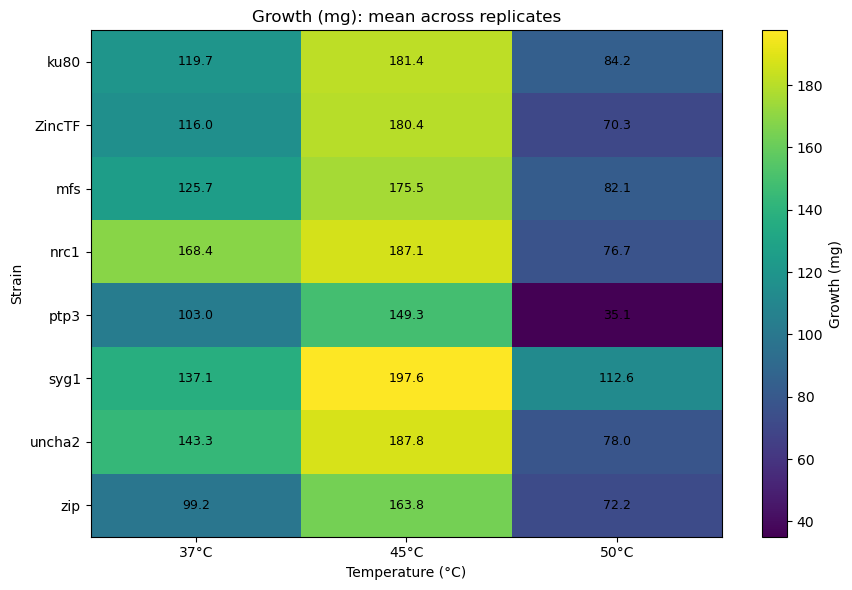

In [3]:
# --- Heatmap of growth (mg) by strain × temperature --------------------------
# Input: a CSV with columns like: Strain, Temp (°C), Growth (mg)
# Output: heatmap + a tidy summary CSV saved next to the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -------- 0) Config --------
CSV_PATH = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains.csv"   # <-- change if needed
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Column autodetect (edit if your headers are known)
def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain","mutant","genotype","line"])
col_temp   = pick(["temp","temperature","temp_c","temperature_c","t"])
col_growth = pick(["growth_mg","mg","mass_mg","biomass_mg","growth","mass","biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°","",regex=False).str.replace("C","",regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain","temp_c","growth_mg"])

# -------- 3) Summary stats (mean ± SD, n, SEM) --------
summary = (
    data.groupby(["strain","temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
        .sort_values(["strain","temp_c"])
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"Saved summary: {SUMMARY_OUT}")

# -------- 4) Build matrix for heatmap --------
# Custom order: put 'ku80' first, then everything else alphabetically
all_strains = sorted(summary["strain"].unique())
ordered_strains = ["ku80"] + [s for s in all_strains if s.lower() != "ku80"]

temps = sorted(summary["temp_c"].unique())

# Pivot to 2D array (rows=strain, cols=temp)
mat = (
    summary.pivot(index="strain", columns="temp_c", values="mean")
    .reindex(index=ordered_strains, columns=temps)
)
vals = mat.values
# -------- 5) Plot heatmap (matplotlib only) --------
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(vals, aspect="auto")

# axis ticks & labels
ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}°C" if float(t).is_integer() else f"{t}°C" for t in temps])
ax.set_yticks(range(len(ordered_strains)))
ax.set_yticklabels(ordered_strains)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")
ax.set_title("Growth (mg): mean across replicates")

# colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Growth (mg)")

# annotate each cell with the value
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        v = vals[i, j]
        if np.isfinite(v):
            ax.text(j, i, f"{v:.1f}", ha="center", va="center", fontsize=9)

plt.tight_layout()
plt.show()

# -------- 6) (Optional) also show normalized-to-37°C heatmap --------
# Uncomment to create a second heatmap where each strain is normalized to its 37°C mean.
# base = summary[summary["temp_c"]==37].set_index("strain")["mean"]
# norm = summary.join(base, on="strain", rsuffix="_37")
# norm["fold_vs_37"] = norm["mean"] / norm["mean_37"]
# mat_norm = norm.pivot(index="strain", columns="temp_c", values="fold_vs_37").reindex(index=strains, columns=temps)
# fig, ax = plt.subplots(figsize=(9, 6))
# im2 = ax.imshow(mat_norm.values, aspect="auto")
# ax.set_xticks(range(len(temps))); ax.set_xticklabels([f"{int(t)}°C" for t in temps])
# ax.set_yticks(range(len(strains))); ax.set_yticklabels(strains)
# ax.set_xlabel("Temperature (°C)"); ax.set_ylabel("Strain")
# ax.set_title("Fold-change vs 37°C (mean growth)")
# fig.colorbar(im2, ax=ax, label="Fold vs 37°C")
# for i in range(mat_norm.shape[0]):
#     for j in range(mat_norm.shape[1]):
#         v = mat_norm.values[i, j]
#         if np.isfinite(v):
#             ax.text(j, i, f"{v:.2f}", ha="center", va="center", fontsize=9)
# plt.tight_layout(); plt.show()


Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv


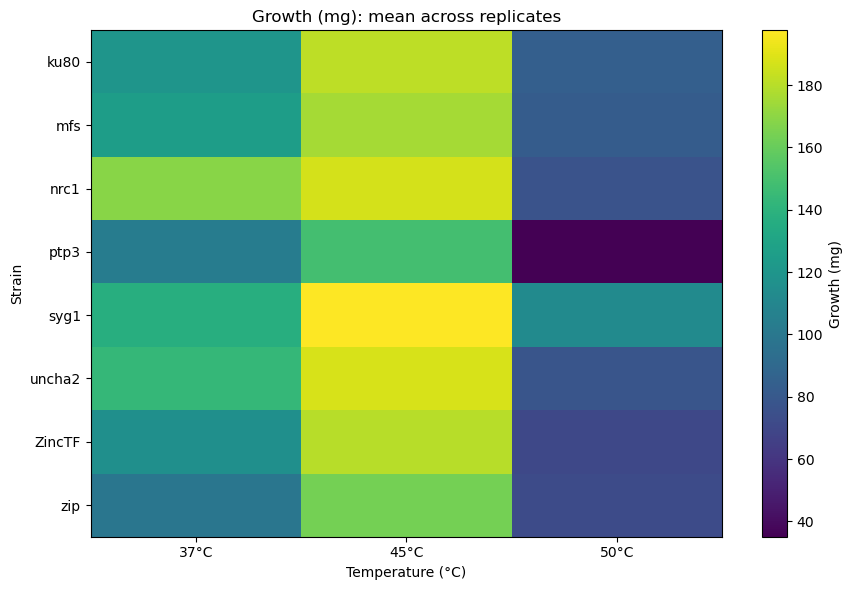

In [2]:
# --- Heatmap of growth (mg) by strain × temperature --------------------------
# Input: a CSV with columns like: Strain, Temp (°C), Growth (mg)
# Output: heatmap + a tidy summary CSV saved next to the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -------- 0) Config --------
CSV_PATH = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains.csv"   # <-- change if needed
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Column autodetect (edit if your headers are known)
def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain","mutant","genotype","line"])
col_temp   = pick(["temp","temperature","temp_c","temperature_c","t"])
col_growth = pick(["growth_mg","mg","mass_mg","biomass_mg","growth","mass","biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°","",regex=False).str.replace("C","",regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain","temp_c","growth_mg"])

# -------- 3) Summary stats (mean ± SD, n, SEM) --------
summary = (
    data.groupby(["strain","temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
        .sort_values(["strain","temp_c"])
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"Saved summary: {SUMMARY_OUT}")

# -------- 4) Build matrix for heatmap (with preferred row order) --------
# Put your exact desired order here (case-insensitive match to what's in the data):
PREFERRED_ORDER = ["ku80", "mfs", "nrc1", "ptp3", "syg1", "uncha2", "ZincTF", "zip"]

# Helper: case-insensitive mapping from canonical names -> actual labels in data
existing = list(summary["strain"].unique())
lower_map = {s.lower(): s for s in existing}

# 1) keep items from PREFERRED_ORDER that exist, in that order
ordered_strains = [lower_map[s.lower()] for s in PREFERRED_ORDER if s.lower() in lower_map]

# 2) append any strains not listed, sorted alphabetically (optional)
leftovers = sorted([s for s in existing if s not in ordered_strains])
ordered_strains += leftovers

temps = sorted(summary["temp_c"].unique())

# Pivot to 2D array (rows=strain, cols=temp)
mat = (
    summary.pivot(index="strain", columns="temp_c", values="mean")
          .reindex(index=ordered_strains, columns=temps)
)
vals = mat.values

# -------- 5) Plot heatmap (matplotlib only) --------
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(vals, aspect="auto")

# Axis ticks & labels
ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}°C" if float(t).is_integer() else f"{t}°C" for t in temps])
ax.set_yticks(range(len(ordered_strains)))
ax.set_yticklabels(ordered_strains)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")
ax.set_title("Growth (mg): mean across replicates")

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Growth (mg)")

# ---- Clean-up: remove numbers inside cells (turn this on if you ever want them) ----
SHOW_VALUES = False
if SHOW_VALUES:
    for i in range(vals.shape[0]):
        for j in range(vals.shape[1]):
            v = vals[i, j]
            if np.isfinite(v):
                ax.text(j, i, f"{v:.1f}", ha="center", va="center", fontsize=9)

plt.tight_layout()
plt.show()


## without 45C data point

Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv


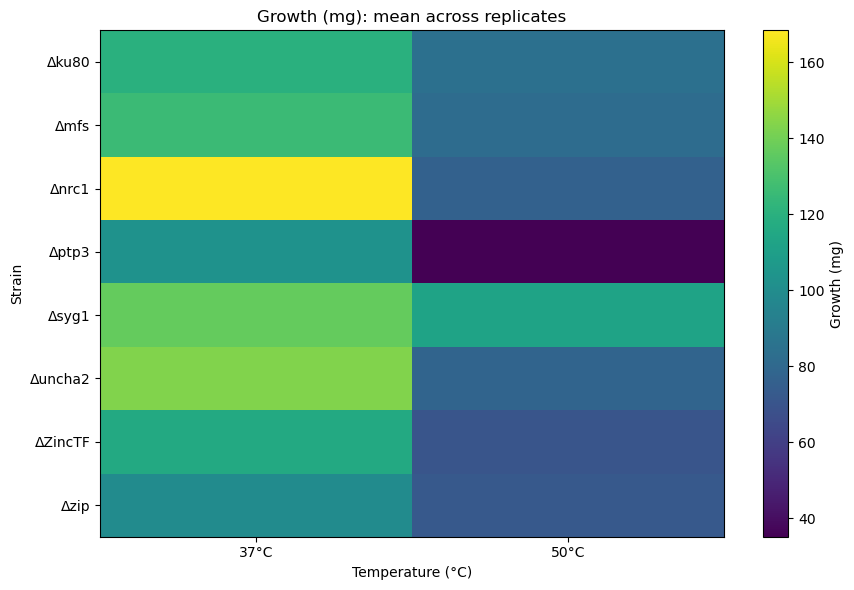

In [6]:
# --- Heatmap of growth (mg) by strain × temperature --------------------------
# Input: a CSV with columns like: Strain, Temp (°C), Growth (mg)
# Output: heatmap + a tidy summary CSV saved next to the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -------- 0) Config --------
CSV_PATH = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains-without_45C_data.csv"   # <-- change if needed
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Column autodetect (edit if your headers are known)
def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain","mutant","genotype","line"])
col_temp   = pick(["temp","temperature","temp_c","temperature_c","t"])
col_growth = pick(["growth_mg","mg","mass_mg","biomass_mg","growth","mass","biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°","",regex=False).str.replace("C","",regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain","temp_c","growth_mg"])

# -------- 3) Summary stats (mean ± SD, n, SEM) --------
summary = (
    data.groupby(["strain","temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
        .sort_values(["strain","temp_c"])
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"Saved summary: {SUMMARY_OUT}")

# -------- 4) Build matrix for heatmap (with preferred row order) --------
# Put your exact desired order here (case-insensitive match to what's in the data):
PREFERRED_ORDER = ["ku80", "mfs", "nrc1", "ptp3", "syg1", "uncha2", "ZincTF", "zip"]

# Helper: case-insensitive mapping from canonical names -> actual labels in data
existing = list(summary["strain"].unique())
lower_map = {s.lower(): s for s in existing}

# 1) keep items from PREFERRED_ORDER that exist, in that order
ordered_strains = [lower_map[s.lower()] for s in PREFERRED_ORDER if s.lower() in lower_map]

# 2) append any strains not listed, sorted alphabetically (optional)
leftovers = sorted([s for s in existing if s not in ordered_strains])
ordered_strains += leftovers

temps = sorted(summary["temp_c"].unique())

# Pivot to 2D array (rows=strain, cols=temp)
mat = (
    summary.pivot(index="strain", columns="temp_c", values="mean")
          .reindex(index=ordered_strains, columns=temps)
)
vals = mat.values

# -------- 5) Plot heatmap (matplotlib only) --------
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(vals, aspect="auto")

# Axis ticks & labels
ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}°C" if float(t).is_integer() else f"{t}°C" for t in temps])

# --- Add Δ in front of each strain label ---
delta_labels = [f"Δ{s}" for s in ordered_strains]

ax.set_yticks(range(len(ordered_strains)))
ax.set_yticklabels(delta_labels)

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")
ax.set_title("Growth (mg): mean across replicates")

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Growth (mg)")

# ---- Clean-up: remove numbers inside cells ----
SHOW_VALUES = False
if SHOW_VALUES:
    for i in range(vals.shape[0]):
        for j in range(vals.shape[1]):
            v = vals[i, j]
            if np.isfinite(v):
                ax.text(j, i, f"{v:.1f}", ha="center", va="center", fontsize=9)

plt.tight_layout()
plt.show()



Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv
Saved stats: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_ttests_vs_ku80_by_temp.csv


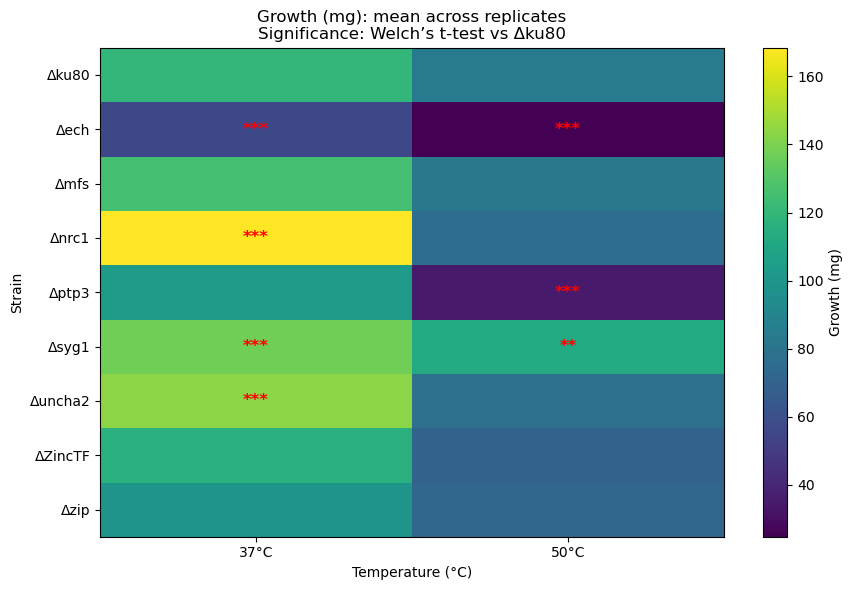

In [2]:
# --- Heatmap of growth (mg) by strain × temperature + stats annotations -------
# Input: CSV columns like: Strain, Temp (°C), Growth (mg)
# Output: heatmap + summary CSV + stats CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats  # <--- NEW

# -------- 0) Config --------
CSV_PATH = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains-without_45C_data.csv"
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")
STATS_OUT   = Path(CSV_PATH).with_name("growth_ttests_vs_ku80_by_temp.csv")  # <--- NEW

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain","mutant","genotype","line"])
col_temp   = pick(["temp","temperature","temp_c","temperature_c","t"])
col_growth = pick(["growth_mg","mg","mass_mg","biomass_mg","growth","mass","biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°","",regex=False).str.replace("C","",regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain","temp_c","growth_mg"])

# -------- 3) Summary stats (mean ± SD, n, SEM) --------
summary = (
    data.groupby(["strain","temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
        .sort_values(["strain","temp_c"])
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"Saved summary: {SUMMARY_OUT}")

# -------- 3b) Welch's t-test vs ku80 at each temperature (from raw replicates) --------
stats_rows = []
for temp, g in data.groupby("temp_c"):
    # control (ku80) at this temperature
    ctrl = g.loc[g["strain"].str.lower()=="ku80", "growth_mg"].dropna()
    if len(ctrl) < 2:
        # not enough control replicates to test; record NaNs for others at this temp
        for s, sub in g.groupby("strain"):
            if s.lower() == "ku80":
                continue
            stats_rows.append({"strain": s, "temp_c": temp, "n_test": sub["growth_mg"].notna().sum(),
                               "n_ctrl": len(ctrl), "t_stat": np.nan, "pval": np.nan})
        continue

    # test each strain vs control
    for s, sub in g.groupby("strain"):
        if s.lower() == "ku80":
            continue
        test = sub["growth_mg"].dropna()
        if len(test) >= 2:
            t, p = stats.ttest_ind(test, ctrl, equal_var=False, nan_policy="omit")
        else:
            t, p = (np.nan, np.nan)
        stats_rows.append({"strain": s, "temp_c": temp, "n_test": len(test),
                           "n_ctrl": len(ctrl), "t_stat": t, "pval": p})

stats_df = pd.DataFrame(stats_rows).sort_values(["strain","temp_c"])
# Significance stars
def stars(p):
    if pd.isna(p): return ""
    if p < 0.001: return "***"
    if p < 0.01:  return "**"
    if p < 0.05:  return "*"
    return ""
stats_df["sig"] = stats_df["pval"].apply(stars)
stats_df.to_csv(STATS_OUT, index=False)
print(f"Saved stats: {STATS_OUT}")

# -------- 4) Build matrix for heatmap (with preferred row order) --------
PREFERRED_ORDER = ["ku80", "ech", "mfs", "nrc1", "ptp3", "syg1", "uncha2", "ZincTF", "zip"]

existing = list(summary["strain"].unique())
lower_map = {s.lower(): s for s in existing}

ordered_strains = [lower_map[s.lower()] for s in PREFERRED_ORDER if s.lower() in lower_map]
leftovers = sorted([s for s in existing if s not in ordered_strains])
ordered_strains += leftovers

temps = sorted(summary["temp_c"].unique())

mat = (
    summary.pivot(index="strain", columns="temp_c", values="mean")
          .reindex(index=ordered_strains, columns=temps)
)
vals = mat.values

# -------- 5) Plot heatmap (matplotlib only) --------
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(vals, aspect="auto")

# Axis ticks & labels
ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}°C" if float(t).is_integer() else f"{t}°C" for t in temps])

# Add Δ prefix to display labels
delta_labels = [f"Δ{s}" for s in ordered_strains]
ax.set_yticks(range(len(ordered_strains)))
ax.set_yticklabels(delta_labels)

ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")
ax.set_title("Growth (mg): mean across replicates\nSignificance: Welch’s t-test vs Δku80")

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Growth (mg)")

# -------- 6) Annotate significance in RED (skip Δku80 row) --------
# Precompute index lookups
row_pos = {s: i for i, s in enumerate(ordered_strains)}
col_pos = {t: j for j, t in enumerate(temps)}

for _, r in stats_df.iterrows():
    s = r["strain"]
    t = r["temp_c"]
    sig = r["sig"]
    if not sig:            # only annotate significant
        continue
    if s.lower() == "ku80":  # never annotate the reference
        continue
    if s in row_pos and t in col_pos and np.isfinite(vals[row_pos[s], col_pos[t]]):
        ax.text(col_pos[t], row_pos[s], sig,
                color="red", ha="center", va="center",
                fontsize=12, fontweight="bold")

# (Optional) show numeric means
SHOW_VALUES = False
if SHOW_VALUES:
    for i in range(vals.shape[0]):
        for j in range(vals.shape[1]):
            v = vals[i, j]
            if np.isfinite(v):
                ax.text(j, i, f"{v:.1f}", ha="center", va="center", fontsize=9)

plt.tight_layout()
plt.show()


Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv
Saved stats: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_ttests_vs_ku80_by_temp.csv


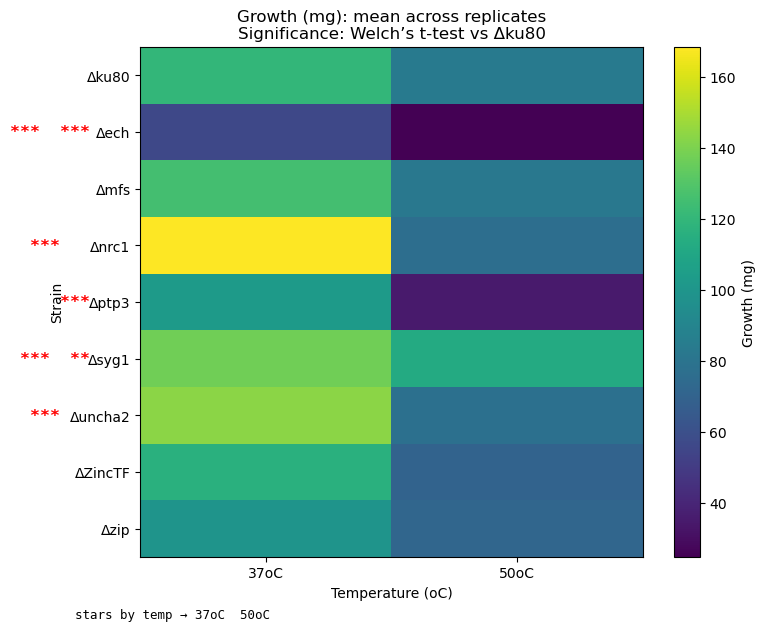

In [1]:
# --- Heatmap of growth (mg) by strain × temperature + stats annotations -------
# Stars shown OUTSIDE the heatmap, before strain names (per-temp vs Δku80)
# Input: CSV columns like: Strain, Temp (°C), Growth (mg)
# Output: heatmap + summary CSV + stats CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import matplotlib.transforms as mtransforms  # <-- to place stars in left margin

# -------- 0) Config --------
CSV_PATH  = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains-without_45C_data.csv"
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")
STATS_OUT   = Path(CSV_PATH).with_name("growth_ttests_vs_ku80_by_temp.csv")

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain","mutant","genotype","line"])
col_temp   = pick(["temp","temperature","temp_c","temperature_c","t"])
col_growth = pick(["growth_mg","mg","mass_mg","biomass_mg","growth","mass","biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°","",regex=False).str.replace("C","",regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain","temp_c","growth_mg"])

# -------- 3) Summary stats (mean ± SD, n, SEM) --------
summary = (
    data.groupby(["strain","temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
        .sort_values(["strain","temp_c"])
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"Saved summary: {SUMMARY_OUT}")

# -------- 3b) Welch's t-test vs ku80 at each temperature --------
stats_rows = []
for temp, g in data.groupby("temp_c"):
    ctrl = g.loc[g["strain"].str.lower()=="ku80", "growth_mg"].dropna()
    # if no/low control reps, we still record NaNs for consistency
    for s, sub in g.groupby("strain"):
        if s.lower() == "ku80":
            continue
        test = sub["growth_mg"].dropna()
        if len(ctrl) >= 2 and len(test) >= 2:
            t, p = stats.ttest_ind(test, ctrl, equal_var=False, nan_policy="omit")
        else:
            t, p = (np.nan, np.nan)
        stats_rows.append({
            "strain": s, "temp_c": temp,
            "n_test": len(test), "n_ctrl": len(ctrl),
            "t_stat": t, "pval": p
        })

stats_df = pd.DataFrame(stats_rows).sort_values(["strain","temp_c"])

def stars(p):
    if pd.isna(p): return ""
    if p < 0.001: return "***"
    if p < 0.01:  return "**"
    if p < 0.05:  return "*"
    return ""

stats_df["sig"] = stats_df["pval"].apply(stars)
stats_df.to_csv(STATS_OUT, index=False)
print(f"Saved stats: {STATS_OUT}")

# -------- 4) Build matrix for heatmap (with preferred row order) --------
PREFERRED_ORDER = ["ku80", "ech", "mfs", "nrc1", "ptp3", "syg1", "uncha2", "ZincTF", "zip"]

existing = list(summary["strain"].unique())
lower_map = {s.lower(): s for s in existing}
ordered_strains = [lower_map[s.lower()] for s in PREFERRED_ORDER if s.lower() in lower_map]
leftovers = sorted([s for s in existing if s not in ordered_strains])
ordered_strains += leftovers

temps = sorted(summary["temp_c"].unique())

mat = (
    summary.pivot(index="strain", columns="temp_c", values="mean")
          .reindex(index=ordered_strains, columns=temps)
)
vals = mat.values

# -------- 5) Plot heatmap (matplotlib only) --------
fig, ax = plt.subplots(figsize=(9.6, 6.4))
im = ax.imshow(vals, aspect="auto")

# Axis ticks & labels
ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}oC" if float(t).is_integer() else f"{t}oC" for t in temps])  # no space before oC

# Δ prefix for display labels
delta_labels = [f"Δ{s}" for s in ordered_strains]
ax.set_yticks(range(len(ordered_strains)))
ax.set_yticklabels(delta_labels)

ax.set_xlabel("Temperature (oC)")
ax.set_ylabel("Strain")
ax.set_title("Growth (mg): mean across replicates\nSignificance: Welch’s t-test vs Δku80")

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Growth (mg)")

# -------- 6) Build per-row star strips and draw them BEFORE the names --------
# We create a star string in the order of `temps` for each strain (excluding ku80).
# Example: for temps [30, 37, 50], a row might display: "*  **  "
# Place it left of the y-axis using a blended transform.

# Lookups
row_pos = {s: i for i, s in enumerate(ordered_strains)}

# Build a dict: strain -> list of stars by temp
star_by_row = {s: [""] * len(temps) for s in ordered_strains if s.lower() != "ku80"}
temp_index = {t: j for j, t in enumerate(temps)}

for _, r in stats_df.iterrows():
    s = r["strain"]
    if s.lower() == "ku80": 
        continue
    if s not in row_pos or r["temp_c"] not in temp_index:
        continue
    star_by_row[s][temp_index[r["temp_c"]]] = r["sig"]

# Compose fixed-spacing label (monospace) per row
def star_strip(stars_list):
    # join with two spaces to visually separate temps
    return "  ".join(s if s != "" else " " for s in stars_list)

# Transform: x in axes fraction (so negative goes left of axis), y in data coords (row index)
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)
x_left = -0.10   # move further left if needed (more negative = farther left)

for s, stars_list in star_by_row.items():
    y = row_pos[s]
    txt = star_strip(stars_list)
    ax.text(
        x_left, y, txt,
        transform=trans, ha="right", va="center",
        color="red", fontsize=12, fontweight="bold",
        family="monospace", clip_on=False
    )

# Optional tiny key to show temp order for the star strip (placed under title area)
ax.text(
    -0.13, -0.10,
    "stars by temp → " + "  ".join([f"{int(t)}oC" if float(t).is_integer() else f"{t}oC" for t in temps]),
    transform=ax.transAxes, ha="left", va="top", fontsize=9, family="monospace"
)

# Give extra room on the left so the star strips are visible
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.33)  # increase if stars get clipped

plt.show()



===== TWO-WAY ANOVA =====
                      sum_sq     df           F        PR(>F)
strain         109037.529105    8.0   23.669118  1.332729e-27
temp_c         145882.425793    1.0  253.337238  4.977692e-41
strain:temp_c   26147.290075    8.0    5.675874  1.083863e-06
Residual       160660.142447  279.0         NaN           NaN
[Saved] ANOVA -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_two_way_ANOVA_strain_temp.csv

Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv
Saved pairwise stats: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_ttests_vs_ku80_by_temp.csv


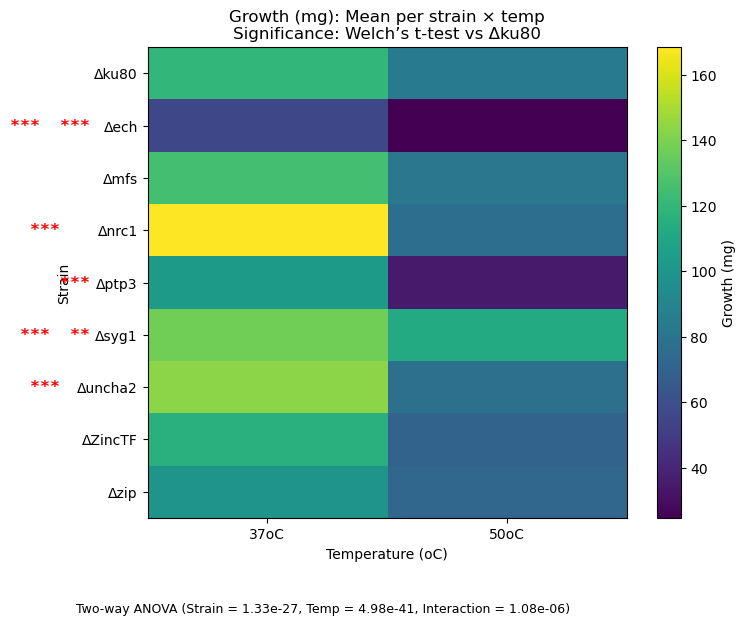

In [2]:
# --- Heatmap of growth (mg) by strain × temperature + stats annotations -------
# Stars shown OUTSIDE the heatmap, before strain names (per-temp vs Δku80)
# Includes: Two-way ANOVA (Strain × Temp) summary line under plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.transforms as mtransforms  # for placing stars in left margin

# -------- 0) Config --------
CSV_PATH  = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains-without_45C_data.csv"
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")
STATS_OUT   = Path(CSV_PATH).with_name("growth_ttests_vs_ku80_by_temp.csv")
ANOVA_OUT   = Path(CSV_PATH).with_name("growth_two_way_ANOVA_strain_temp.csv")

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain","mutant","genotype","line"])
col_temp   = pick(["temp","temperature","temp_c","temperature_c","t"])
col_growth = pick(["growth_mg","mg","mass_mg","biomass_mg","growth","mass","biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°","",regex=False).str.replace("C","",regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain","temp_c","growth_mg"])

# -------- 2b) TWO-WAY ANOVA (Strain × Temp) --------
anova_df = data.copy()
anova_df["strain"] = anova_df["strain"].astype("category")
anova_df["temp_c"] = anova_df["temp_c"].astype("category")

model = ols("growth_mg ~ strain * temp_c", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table.to_csv(ANOVA_OUT)
print("\n===== TWO-WAY ANOVA =====")
print(anova_table)
print(f"[Saved] ANOVA -> {ANOVA_OUT}")

# -------- 3) Summary stats (mean ± SD, SEM) --------
summary = (
    data.groupby(["strain","temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"\nSaved summary: {SUMMARY_OUT}")

# -------- 3b) Welch's t-test vs ku80 at each temperature --------
stats_rows = []
for temp, g in data.groupby("temp_c"):
    ctrl = g.loc[g["strain"].str.lower()=="ku80", "growth_mg"].dropna()
    for s, sub in g.groupby("strain"):
        if s.lower() == "ku80":
            continue
        test = sub["growth_mg"].dropna()
        if len(ctrl) >= 2 and len(test) >= 2:
            t, p = stats.ttest_ind(test, ctrl, equal_var=False, nan_policy="omit")
        else:
            p = np.nan
        stats_rows.append({"strain": s, "temp_c": temp, "pval": p})

stats_df = pd.DataFrame(stats_rows)

def stars(p):
    if pd.isna(p): return ""
    if p < 0.001: return "***"
    if p < 0.01:  return "**"
    if p < 0.05:  return "*"
    return ""

stats_df["sig"] = stats_df["pval"].apply(stars)
stats_df.to_csv(STATS_OUT, index=False)
print(f"Saved pairwise stats: {STATS_OUT}")

# -------- 4) Heatmap matrix (respect preferred row order) --------
PREFERRED_ORDER = ["ku80", "ech", "mfs", "nrc1", "ptp3", "syg1", "uncha2", "zinctf", "zip"]
existing = list(summary["strain"].unique())
lower_map = {s.lower(): s for s in existing}
ordered_strains = [lower_map[s.lower()] for s in PREFERRED_ORDER if s.lower() in lower_map]
ordered_strains += sorted([s for s in existing if s not in ordered_strains])
temps = sorted(summary["temp_c"].unique())

mat = summary.pivot(index="strain", columns="temp_c", values="mean").reindex(index=ordered_strains, columns=temps)
vals = mat.values

# -------- 5) Plot heatmap --------
fig, ax = plt.subplots(figsize=(9.6, 6.4))
im = ax.imshow(vals, aspect="auto", cmap="viridis")

ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}oC" if float(t).is_integer() else f"{t}oC" for t in temps])
ax.set_yticks(range(len(ordered_strains)))
ax.set_yticklabels([f"Δ{s}" for s in ordered_strains])

ax.set_xlabel("Temperature (oC)")
ax.set_ylabel("Strain")
ax.set_title("Growth (mg): Mean per strain × temp\nSignificance: Welch’s t-test vs Δku80")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Growth (mg)")

# -------- 6) Draw star strips BEFORE strain labels --------
row_pos = {s: i for i, s in enumerate(ordered_strains)}
temp_index = {t: j for j, t in enumerate(temps)}

star_by_row = {s: [""] * len(temps) for s in ordered_strains if s.lower()!="ku80"}
for _, r in stats_df.iterrows():
    if r["strain"].lower()!="ku80" and r["strain"] in star_by_row:
        star_by_row[r["strain"]][temp_index[r["temp_c"]]] = r["sig"]

def star_strip(L):
    return "  ".join(s if s!="" else " " for s in L)

trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)
x_left = -0.12

for s, L in star_by_row.items():
    ax.text(
        x_left, row_pos[s], star_strip(L),
        transform=trans, ha="right", va="center",
        color="red", family="monospace", fontsize=12, fontweight="bold", clip_on=False
    )

# -------- 7) ANOVA summary printed under plot --------
p_strain = anova_table.loc["strain","PR(>F)"]
p_temp   = anova_table.loc["temp_c","PR(>F)"]
p_inter  = anova_table.loc["strain:temp_c","PR(>F)"]

ax.text(
    -0.15, -0.20,
    f"Two-way ANOVA (Strain = {p_strain:.2e}, Temp = {p_temp:.2e}, Interaction = {p_inter:.2e})",
    transform=ax.transAxes, fontsize=9, ha="left"
)

plt.tight_layout()
plt.gcf().subplots_adjust(left=0.36)
plt.show()



===== TWO-WAY ANOVA =====
                      sum_sq     df           F        PR(>F)
strain         109037.529105    8.0   23.669118  1.332729e-27
temp_c         145882.425793    1.0  253.337238  4.977692e-41
strain:temp_c   26147.290075    8.0    5.675874  1.083863e-06
Residual       160660.142447  279.0         NaN           NaN
[Saved] ANOVA -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_two_way_ANOVA_strain_temp.csv
[Saved] Tukey (strain vs ku80) -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_tukey_strain_vs_ku80.csv
Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv


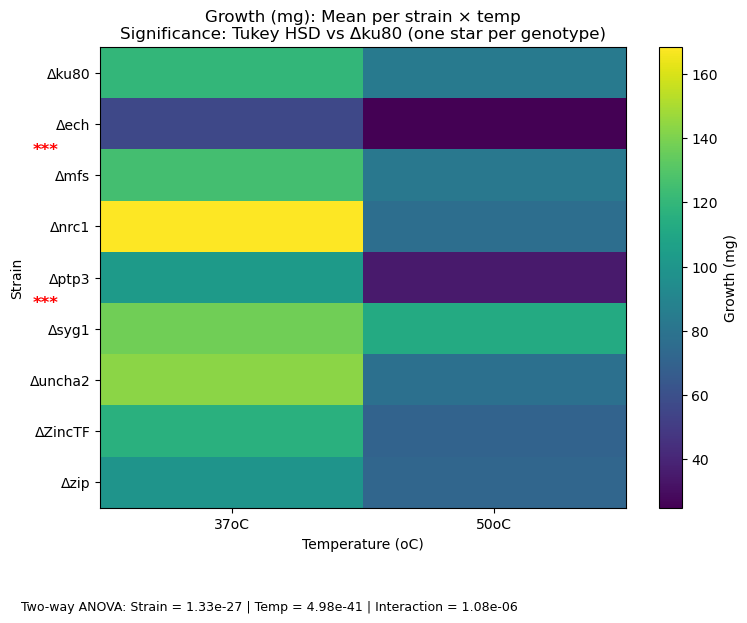

In [3]:
# --- Heatmap of growth (mg) by strain × temperature + ANOVA + Tukey vs Δku80 --
# One star per genotype (Tukey HSD on Strain factor vs Δku80), shown BEFORE names

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.transforms as mtransforms  # to place stars in left margin

# -------- 0) Config --------
CSV_PATH  = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains-without_45C_data.csv"
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")
ANOVA_OUT   = Path(CSV_PATH).with_name("growth_two_way_ANOVA_strain_temp.csv")
TUKEY_OUT   = Path(CSV_PATH).with_name("growth_tukey_strain_vs_ku80.csv")

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain","mutant","genotype","line"])
col_temp   = pick(["temp","temperature","temp_c","temperature_c","t"])
col_growth = pick(["growth_mg","mg","mass_mg","biomass_mg","growth","mass","biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°","",regex=False).str.replace("C","",regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain","temp_c","growth_mg"])

# -------- 2b) TWO-WAY ANOVA (Strain × Temp) --------
anova_df = data.copy()
anova_df["strain"] = anova_df["strain"].astype("category")
anova_df["temp_c"] = anova_df["temp_c"].astype("category")

model = ols("growth_mg ~ strain * temp_c", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table.to_csv(ANOVA_OUT)
print("\n===== TWO-WAY ANOVA =====")
print(anova_table)
print(f"[Saved] ANOVA -> {ANOVA_OUT}")

# -------- 3) Tukey HSD on Strain factor: extract comparisons vs ku80 ----------
# This gives ONE p-value per genotype vs ku80, averaged over temps (as a factor level)
tukey = pairwise_tukeyhsd(endog=anova_df["growth_mg"],
                          groups=anova_df["strain"],
                          alpha=0.05)

tukey_df = pd.DataFrame(tukey._results_table.data[1:], columns=tukey._results_table.data[0])
# Ensure lowercase matching for robustness
tukey_df["group1_l"] = tukey_df["group1"].astype(str).str.lower()
tukey_df["group2_l"] = tukey_df["group2"].astype(str).str.lower()

# Keep only rows where one group is ku80
tukey_vs_ku80 = tukey_df[(tukey_df["group1_l"]=="ku80") | (tukey_df["group2_l"]=="ku80")].copy()

# Determine the non-ku80 strain name for each row
tukey_vs_ku80["strain_vs"] = np.where(tukey_vs_ku80["group1_l"]=="ku80",
                                      tukey_vs_ku80["group2"],
                                      tukey_vs_ku80["group1"])

def p_to_stars(p):
    if pd.isna(p): return ""
    return "***" if p < 1e-3 else "**" if p < 1e-2 else "*" if p < 0.05 else ""

tukey_vs_ku80["sig"] = tukey_vs_ku80["p-adj"].astype(float).apply(p_to_stars)
tukey_vs_ku80[["strain_vs","p-adj","reject","sig"]].to_csv(TUKEY_OUT, index=False)
print(f"[Saved] Tukey (strain vs ku80) -> {TUKEY_OUT}")

# Build a mapping: strain -> star (single)
star_map = {row["strain_vs"]: row["sig"] for _, row in tukey_vs_ku80.iterrows()}

# -------- 4) Summary stats for heatmap (mean per strain × temp) --------------
summary = (
    data.groupby(["strain","temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"Saved summary: {SUMMARY_OUT}")

# -------- 5) Build matrix for heatmap (preferred order) ----------------------
PREFERRED_ORDER = ["ku80", "ech", "mfs", "nrc1", "ptp3", "syg1", "uncha2", "zinctf", "zip"]
existing = list(summary["strain"].unique())
lower_map = {s.lower(): s for s in existing}
ordered_strains = [lower_map[s.lower()] for s in PREFERRED_ORDER if s.lower() in lower_map]
ordered_strains += sorted([s for s in existing if s not in ordered_strains])
temps = sorted(summary["temp_c"].unique())

mat = summary.pivot(index="strain", columns="temp_c", values="mean").reindex(index=ordered_strains, columns=temps)
vals = mat.values

# -------- 6) Plot heatmap and place ONE star per genotype (before label) -----
fig, ax = plt.subplots(figsize=(9.6, 6.4))
im = ax.imshow(vals, aspect="auto", cmap="viridis")

ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}oC" if float(t).is_integer() else f"{t}oC" for t in temps])
ax.set_yticks(range(len(ordered_strains)))
ax.set_yticklabels([f"Δ{s}" for s in ordered_strains])

ax.set_xlabel("Temperature (oC)")
ax.set_ylabel("Strain")
ax.set_title("Growth (mg): Mean per strain × temp\nSignificance: Tukey HSD vs Δku80 (one star per genotype)")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Growth (mg)")

# Place one star per genotype (skip ku80), BEFORE the label
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)
x_left = -0.08  # move farther left if needed

for i, s in enumerate(ordered_strains):
    if str(s).lower() == "ku80":
        continue
    sig = star_map.get(s, "")  # "" if not significant vs ku80
    if sig:
        ax.text(
            x_left, i + 0.5, sig,
            transform=trans, ha="right", va="center",
            color="red", fontsize=12, fontweight="bold",
            clip_on=False
        )

# -------- 7) ANOVA summary under the plot ------------------------------------
p_strain = anova_table.loc["strain","PR(>F)"]
p_temp   = anova_table.loc["temp_c","PR(>F)"]
p_inter  = anova_table.loc["strain:temp_c","PR(>F)"]

ax.text(
    -0.15, -0.20,
    f"Two-way ANOVA: Strain = {p_strain:.2e} | Temp = {p_temp:.2e} | Interaction = {p_inter:.2e}",
    transform=ax.transAxes, ha="left", va="top", fontsize=9
)

plt.tight_layout()
plt.gcf().subplots_adjust(left=0.30)  # give room for the single star
plt.show()


### to normalize to ku80

Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv


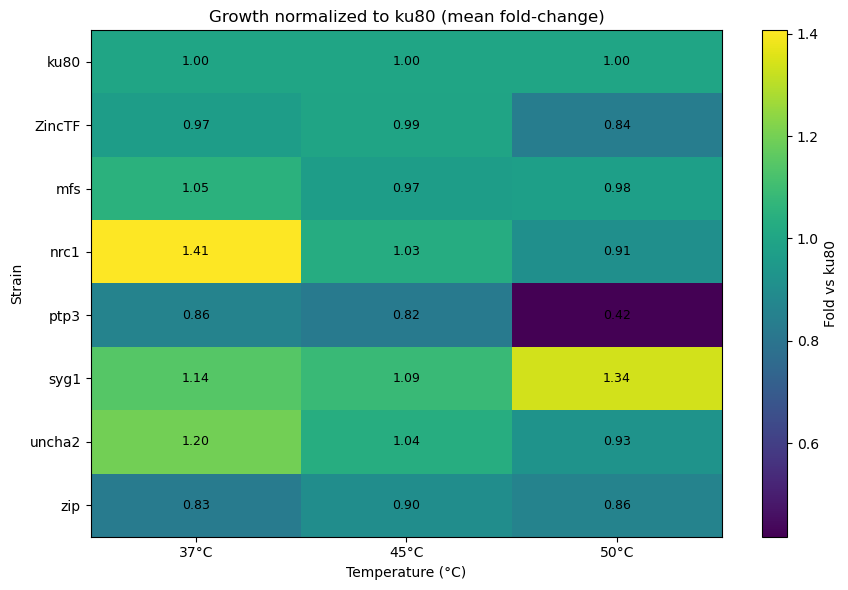

In [4]:
# --- Heatmap of growth normalized to ku80 (mg) by strain × temperature -------
# Input:  CSV with columns like: Strain, Temp (°C), Growth (mg)
# Output: Heatmap of fold-change vs ku80 + tidy summary CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -------- 0) Config --------
CSV_PATH = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains.csv"
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain", "mutant", "genotype", "line"])
col_temp   = pick(["temp", "temperature", "temp_c", "temperature_c", "t"])
col_growth = pick(["growth_mg", "mg", "mass_mg", "biomass_mg", "growth", "mass", "biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°", "", regex=False).str.replace("C", "", regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain", "temp_c", "growth_mg"])

# -------- 3) Summary stats (mean ± SD, n, SEM) --------
summary = (
    data.groupby(["strain", "temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
        .sort_values(["strain", "temp_c"])
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"Saved summary: {SUMMARY_OUT}")

# -------- 3b) Normalize each strain to ku80 at the same temperature --------
ku80_ref = (
    summary[summary["strain"].str.lower() == "ku80"]
    .set_index("temp_c")["mean"]
    .to_dict()
)

summary["fold_vs_ku80"] = summary.apply(
    lambda r: r["mean"] / ku80_ref.get(r["temp_c"], np.nan), axis=1
)

# -------- 4) Build matrix for heatmap --------
# Custom order: ku80 first, then all others alphabetically
all_strains = sorted(summary["strain"].unique())
ordered_strains = ["ku80"] + [s for s in all_strains if s.lower() != "ku80"]

temps = sorted(summary["temp_c"].unique())

# Pivot to 2D array (rows = strain, cols = temp)
mat = (
    summary.pivot(index="strain", columns="temp_c", values="fold_vs_ku80")
    .reindex(index=ordered_strains, columns=temps)
)
vals = mat.values

# -------- 5) Plot heatmap --------
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(vals, aspect="auto")

# Axis ticks & labels
ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}°C" if float(t).is_integer() else f"{t}°C" for t in temps])
ax.set_yticks(range(len(ordered_strains)))
ax.set_yticklabels(ordered_strains)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")
ax.set_title("Growth normalized to ku80 (mean fold-change)")

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Fold vs ku80")

# Annotate each cell
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        v = vals[i, j]
        if np.isfinite(v):
            ax.text(j, i, f"{v:.2f}", ha="center", va="center", fontsize=9)

plt.tight_layout()
plt.show()

# -------- (Optional) also show raw growth heatmap --------
# Uncomment this block if you want to compare with raw mean mg values
# mat_raw = (
#     summary.pivot(index="strain", columns="temp_c", values="mean")
#     .reindex(index=ordered_strains, columns=temps)
# )
# fig, ax = plt.subplots(figsize=(9, 6))
# im = ax.imshow(mat_raw.values, aspect="auto")
# ax.set_xticks(range(len(temps)))
# ax.set_xticklabels([f"{int(t)}°C" for t in temps])
# ax.set_yticks(range(len(ordered_strains)))
# ax.set_yticklabels(ordered_strains)
# ax.set_xlabel("Temperature (°C)")
# ax.set_ylabel("Strain")
# ax.set_title("Raw Growth (mg)")
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label("Growth (mg)")
# for i in range(mat_raw.shape[0]):
#     for j in range(mat_raw.shape[1]):
#         v = mat_raw.values[i, j]
#         if np.isfinite(v):
#             ax.text(j, i, f"{v:.1f}", ha="center", va="center", fontsize=9)
# plt.tight_layout()
# plt.show()


Saved summary: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_summary_by_strain_temp.csv


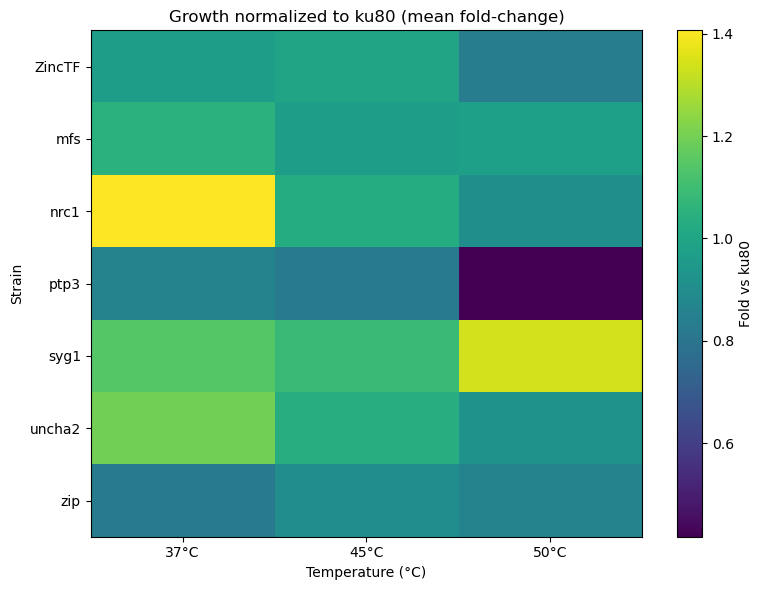

In [5]:
# --- Heatmap of growth normalized to ku80 (mg) by strain × temperature -------
# Input:  CSV with columns like: Strain, Temp (°C), Growth (mg)
# Output: Heatmap of fold-change vs ku80 + tidy summary CSV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -------- 0) Config --------
CSV_PATH = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Mutant_Assay_results/growth_data_all_temp_strains.csv"
SUMMARY_OUT = Path(CSV_PATH).with_name("growth_summary_by_strain_temp.csv")

# -------- 1) Load & normalize column names --------
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

def pick(cands):
    for c in cands:
        if c in df.columns:
            return c
    raise ValueError(f"Could not find any of: {cands}. Found: {list(df.columns)}")

col_strain = pick(["strain", "mutant", "genotype", "line"])
col_temp   = pick(["temp", "temperature", "temp_c", "temperature_c", "t"])
col_growth = pick(["growth_mg", "mg", "mass_mg", "biomass_mg", "growth", "mass", "biomass"])

# -------- 2) Clean values --------
def to_num_temp(s):
    s = s.astype(str).str.replace("°", "", regex=False).str.replace("C", "", regex=False)
    return pd.to_numeric(s, errors="coerce")

data = pd.DataFrame({
    "strain": df[col_strain].astype(str).str.strip(),
    "temp_c": to_num_temp(df[col_temp]),
    "growth_mg": pd.to_numeric(df[col_growth], errors="coerce")
}).dropna(subset=["strain", "temp_c", "growth_mg"])

# -------- 3) Summary stats (mean ± SD, n, SEM) --------
summary = (
    data.groupby(["strain", "temp_c"])["growth_mg"]
        .agg(mean="mean", sd="std", n="count")
        .reset_index()
        .sort_values(["strain", "temp_c"])
)
summary["sem"] = summary["sd"] / np.sqrt(summary["n"].replace(0, np.nan))
summary.to_csv(SUMMARY_OUT, index=False)
print(f"Saved summary: {SUMMARY_OUT}")

# -------- 3b) Normalize each strain to ku80 at the same temperature --------
ku80_ref = (
    summary[summary["strain"].str.lower() == "ku80"]
    .set_index("temp_c")["mean"]
    .to_dict()
)

summary["fold_vs_ku80"] = summary.apply(
    lambda r: r["mean"] / ku80_ref.get(r["temp_c"], np.nan), axis=1
)

# -------- 4) Build matrix for heatmap --------
# Custom order: ku80 first, then all others alphabetically
all_strains = sorted(summary["strain"].unique())
ordered_strains = ["ku80"] + [s for s in all_strains if s.lower() != "ku80"]

temps = sorted(summary["temp_c"].unique())

# Pivot to 2D array (rows = strain, cols = temp)
mat = (
    summary.pivot(index="strain", columns="temp_c", values="fold_vs_ku80")
    .reindex(index=ordered_strains, columns=temps)
)
vals = mat.values

# -------- 5) Plot heatmap (no annotations, ku80 row removed) --------
# Drop ku80 row since it is the normalization reference
mat_no_ku80 = mat.drop(index="ku80", errors="ignore")
vals = mat_no_ku80.values

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(vals, aspect="auto")

# Axis ticks & labels
ax.set_xticks(range(len(temps)))
ax.set_xticklabels([f"{int(t)}°C" if float(t).is_integer() else f"{t}°C" for t in temps])
ax.set_yticks(range(len(mat_no_ku80.index)))
ax.set_yticklabels(mat_no_ku80.index)
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")
ax.set_title("Growth normalized to ku80 (mean fold-change)")

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Fold vs ku80")

# ✅ Removed per-cell text annotations
plt.tight_layout()
plt.show()

# -------- (Optional) also show raw growth heatmap --------
# Uncomment this block if you want to compare with raw mean mg values
# mat_raw = (
#     summary.pivot(index="strain", columns="temp_c", values="mean")
#     .reindex(index=ordered_strains, columns=temps)
# )
# fig, ax = plt.subplots(figsize=(9, 6))
# im = ax.imshow(mat_raw.values, aspect="auto")
# ax.set_xticks(range(len(temps)))
# ax.set_xticklabels([f"{int(t)}°C" for t in temps])
# ax.set_yticks(range(len(ordered_strains)))
# ax.set_yticklabels(ordered_strains)
# ax.set_xlabel("Temperature (°C)")
# ax.set_ylabel("Strain")
# ax.set_title("Raw Growth (mg)")
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label("Growth (mg)")
# for i in range(mat_raw.shape[0]):
#     for j in range(mat_raw.shape[1]):
#         v = mat_raw.values[i, j]
#         if np.isfinite(v):
#             ax.text(j, i, f"{v:.1f}", ha="center", va="center", fontsize=9)
# plt.tight_layout()
# plt.show()
